# 형태학적 처리
- 침식연산
- 팽창연산
- 열림연산
- 닫힘연산

# 침식 erosion
- 끊어져 있는 영상을 지우는 연산
- 최소값 필터

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

src = cv2.imread('erosion.jpg',0)
dst = np.copy(src)
H,W = src.shape[:2]

thr = 100
binary = np.where(dst < thr, 0, 255)
mask_size = 3

In [16]:
boundary = int ((mask_size -1) /2.0)

In [17]:
for h in range(boundary, H -boundary):
    for w in range(boundary, W - boundary):
        src_mask = binary[h-boundary:h+boundary+1, w-boundary:w+boundary+1]
        dst[h,w] = np.min(src_mask)

dst = dst.astype(np.uint8)

Text(0.5, 1.0, 'Erosion')

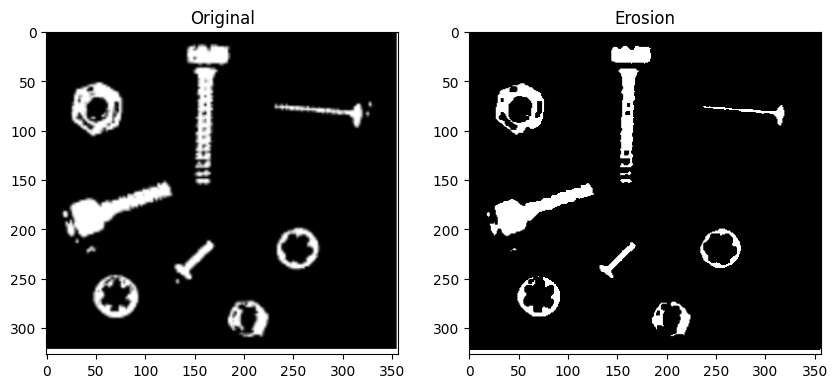

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].imshow(src,cmap= 'gray')
axes[0].set_title('Original')
axes[1].imshow(dst, cmap = 'gray')
axes[1].set_title('Erosion')

# 팽창 dilation 
- 좀더 진해짐
- 최대 값 필터

In [19]:
for h in range(boundary, H -boundary):
    for w in range(boundary, W - boundary):
        src_mask = binary[h-boundary:h+boundary+1, w-boundary:w+boundary+1]
        dst[h,w] = np.max(src_mask)

dst = dst.astype(np.uint8)

Text(0.5, 1.0, 'Dilation')

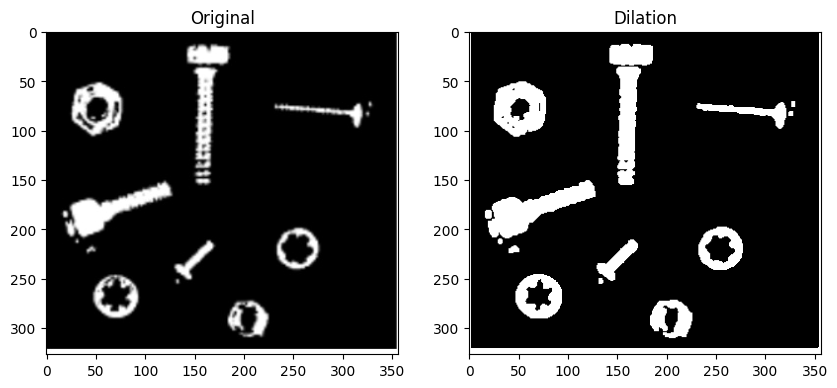

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].imshow(src,cmap= 'gray')
axes[0].set_title('Original')
axes[1].imshow(dst, cmap = 'gray')
axes[1].set_title('Dilation')

# 열린 open
- 침식 -> 팽창
- 주변에 있는 것은 복구가 되고 아닌것은 원래대로 복구가 안됨

In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

src = cv2.imread('open_calc.jpg',0)
dst = np.zeros_like(src)
H,W = src.shape[:2]

thr = 120
binary = np.where(src < thr, 0, 255)
mask_size = 5

boundary = int ((mask_size - 1) /2.0)

In [22]:
def erosion(size,bin):
    boundary = int ((size - 1) /2.0)
    for h in range(boundary, H -boundary):
        for w in range(boundary, W - boundary):
            src_mask = bin[h-boundary:h+boundary+1, w-boundary:w+boundary+1]
            dst[h,w] = np.min(src_mask)


In [23]:
erosion(5, binary) # mask_size = 5
dst_erosion = dst.astype(np.uint8)

In [24]:
def dilation(size, bin):
    boundary = int ((size - 1) /2.0)
    for h in range(boundary, H -boundary):
        for w in range(boundary, W - boundary):
            src_mask = bin[h-boundary:h+boundary+1, w-boundary:w+boundary+1]
            dst[h,w] = np.max(src_mask)

In [25]:
dilation(3, dst_erosion) # mask_size = 3

In [26]:
dst_open = dst.astype(np.uint8)

Text(0.5, 1.0, 'Open')

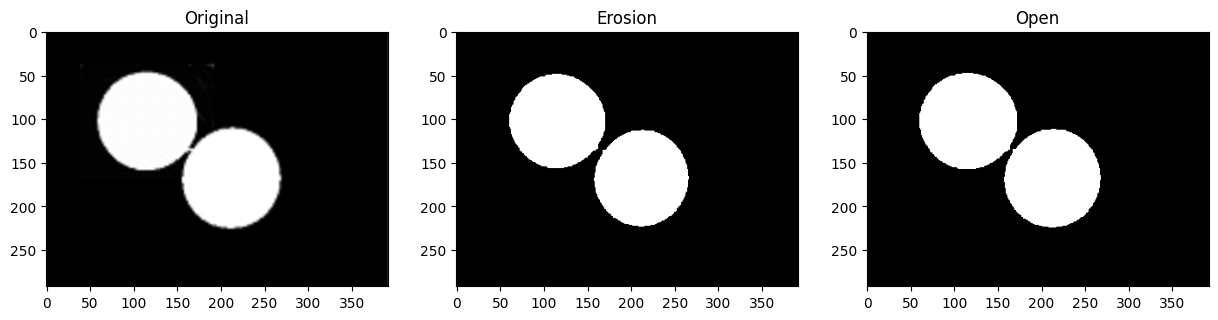

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axes[0].imshow(src, cmap= 'gray')
axes[0].set_title('Original')
axes[1].imshow(dst_erosion,cmap= 'gray')
axes[1].set_title('Erosion')
axes[2].imshow(dst_open, cmap = 'gray')
axes[2].set_title('Open')

# 열림 연산

Text(0.5, 1.0, 'Open')

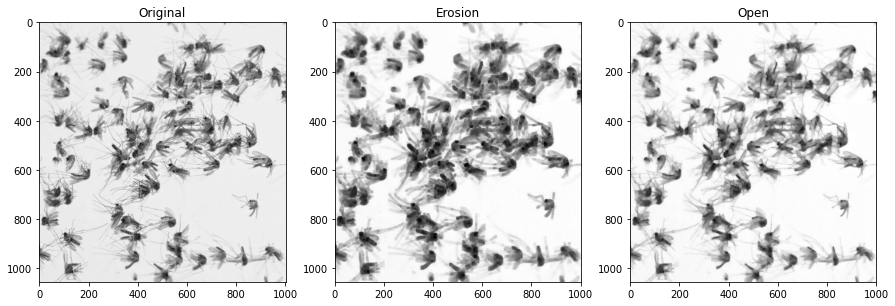

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

src = cv2.imread('cell.jpg',0)
kernel = np.ones((3,3))

erosion = cv2.erode(src, kernel, iterations=3)
open = cv2.dilate(erosion, kernel, iterations=3)



fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axes[0].imshow(src, cmap= 'gray')
axes[0].set_title('Original')
axes[1].imshow(erosion,cmap= 'gray')
axes[1].set_title('Erosion')
axes[2].imshow(open, cmap = 'gray')
axes[2].set_title('Open')

# binary

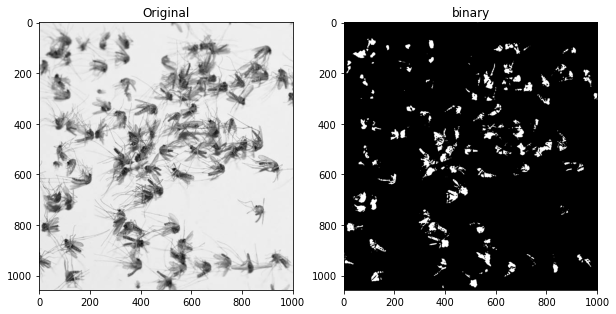

In [12]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

# src= cv2.imread("cell.jpg",0)
src= cv2.imread("mosquito.png",0)

h,w = src.shape
T = 100
dst = np.where(src >= T, 0,255)



fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].imshow(src, cmap = 'gray')
axes[0].set_title('Original')
axes[1].imshow(dst, cmap = 'gray')
axes[1].set_title('binary')

plt.show()

In [6]:
dst= dst.astype(np.uint8)
kernel = np.ones((3,3))
dst_erosion = cv2.erode(dst, kernel, iterations=2)
dst_dilation = cv2.dilate(dst_erosion, kernel, iterations=2)

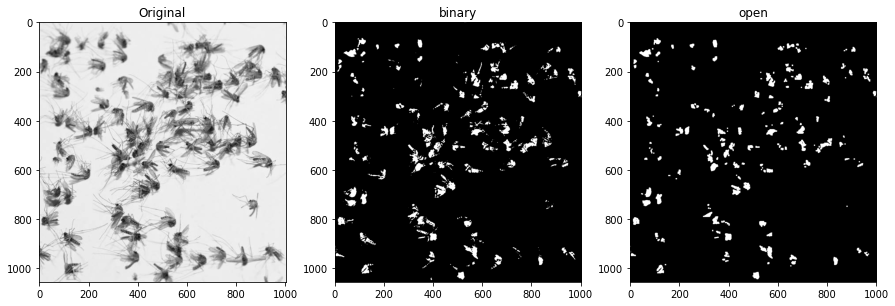

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axes[0].imshow(src, cmap = 'gray')
axes[0].set_title('Original')
axes[1].imshow(dst, cmap = 'gray')
axes[1].set_title('binary')
axes[2].imshow(dst_dilation, cmap = 'gray')
axes[2].set_title('open')
plt.show()

# 실습

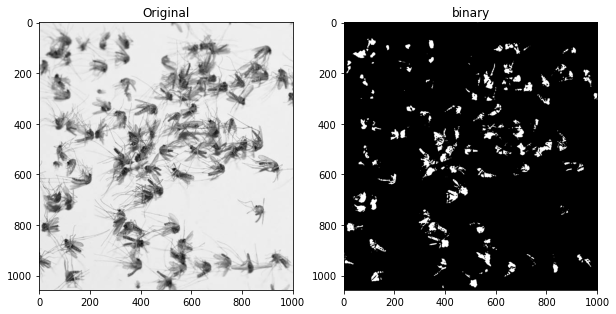

In [14]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

src= cv2.imread("mosquito.png",0)
h,w = src.shape
T = 100
dst = np.where(src >= T, 0,255)

# dst[src>=T] = 255

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].imshow(src, cmap = 'gray')
axes[0].set_title('Original')
axes[1].imshow(dst, cmap = 'gray')
axes[1].set_title('binary')

plt.show()

In [15]:
dst= dst.astype(np.uint8)
kernel = np.ones((3,3))
dst_erosion = cv2.erode(dst, kernel, iterations=2)
dst_dilation = cv2.dilate(dst_erosion, kernel, iterations=2)

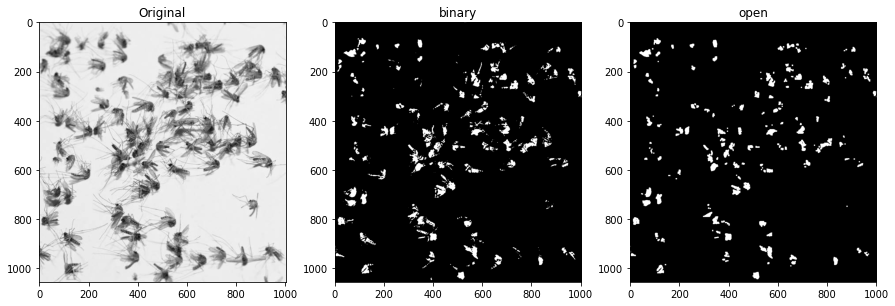

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axes[0].imshow(src, cmap = 'gray')
axes[0].set_title('Original')
axes[1].imshow(dst, cmap = 'gray')
axes[1].set_title('binary')
axes[2].imshow(dst_dilation, cmap = 'gray')
axes[2].set_title('open')
plt.show()